Mohammad Bank Tavakoli

# How COVID-19 deaths associate with human development parameters across the nations of the globe

## Background

According to the CDC, COVID-19 is a disease caused by a virus named SARS-CoV-2 and was discovered in December 2019 in Wuhan, China. It is typically spread between persons through respiratory droplets that release when one coughs, sneezes, talks or even breathes. Although there has been variants of the disease around the globe since then, COVID-19 has often been compared to the flu due to the parallels in the symptoms they induce. However, COVID-19 particles are much smaller than flu particles (respiratory droplets) that can linger in the air for minutes and potentially hours. This allows for the airborne transmission, making it even more contagious. A number of complications rise as result of this disease such as long-term damage to the lungs, brain and a variety of other organs. This leaves the highest-case fatality rates to be observed in the older population who are more vulnerable to these complications. Moreover, countries with limited health resources are at risk of high infectivity rates and fatality rates.

This topic intrigued me as it is a global pandemic and has the potential to affect the entire population. More specifically, I became intrigued with the human developmental parameters such as economy, health and education effect on the COVID-19 fatality rate. Observing the affect economic parameters (specifically GDP per capita in this project) has on the fatality rate across nations of the globe would shed insight as to why some countries had better responses to the global pandemic while others did not. 

The data for this project comes from the World Health Organization (WHO) and the United Nations human development reports. The data extracted from WHO includes the numbers of confirmed COVID-19 cases and deaths through official communications under the International Health Regulations (IHR, 2005) to the present. The data extracted from the UN human development reports includes GDP per capita, education index and life expectancy index for almost all countries up to the year of 2019. 

### Variables of Interest

**Country ID** = CountryName

**Human Developmental Measures:**
* **Life Expectancy Index:** (lifeExpectancyIndex) life expectancy at birth expressed as an index using a minimum value of 20 years and a maximum value of 85 years
* **Education Index:** (educationIndex) an average of mean years of schooling (of adults) and expected years of schooling (of children), both expressed as an index obtained by scaling with the corresponding maxima
* **GDP Per Capita:** (gdpPerCapita) the gross domestic product divided by the total population of a given country in 2019

**COVID-19 Measures:**
* **Cumulative Confirmed Cases:** (cumulativeCases) the cumulative confirmed COVID-19 cases reported to WHO to date
* **Cumulative Death Cases:** (cumulativeDeaths) the cumulative confirmed COVID-19 deaths reported to WHO to date
* **COVID-19 Fatality Rate:** (fatalityRate) the cumulative death cases divided by the cumulative confirmed cases

### Hypothesis

I hypothesize that GDP per capita associates COVID-19 fatality rate across 171 countries

### Data Plan Organization

* Data Cleansing (Step by step):
    * Data Auditing
    * Types of Data Anomalies
* Data Architecture Visualization
* Statistical Analysis:
    * Linear Regression
    * Mediation Analysis
    * Bootstrapping
    * Cross-Validation Analysis

### Data Cleansing

#### Data Auditing

1. Create a new csv file that combines the Human Developmental measures and COVID-19 measures into a single dataframe
2. Only keep the variables relevant to my overarching hypothesis (as can be seen under the "Variables of Interest" subheading)
3. Format country names to be consistent and maintain alphabetical order
    * Ex. Human Developmental measures use Cote d'ivoire while WHO uses Ivory Coast. This can also be seen with South Korea vs Republic of Korea, Congo vs Republic of Congo and any country with accented letters
4. Remove countries with missing data
    * Ex. some countries did not have a GDP Per Capita measure while other countries did not have a life expectancy index
5. Verify that the data is the most up to date

#### Types of Data Anomalies

1. Syntactical anomalies (more specifically, domain format error) with the country names across datasets
2. Coverage anomalies (more specifically, missing values) with Human Developmental measures 

### Data Architecture Visualization

#### Resulting Tidy-compliant Table:

In [2]:
setwd("~/Downloads")
data = read.csv("dataframe-COVID.csv")
head(data)

,CountryName,lifeExpectancyIndex,educationIndex,gdpPerCapita,cumulativeCases,cumulativeDeaths,fatalityRate
,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
1,Afghanistan,0.690,0.414,2202,178879,7683,0.04295082
2,Albania,0.901,0.746,13962,275167,3496,0.01270501
3,Algeria,0.875,0.672,11350,265782,6875,0.02586706
4,Angola,0.633,0.500,6654,99287,1900,0.01913644
5,Antigua and Barbuda,0.877,0.665,21908,7626,136,0.01783373
6,Argentina,0.872,0.855,22034,9083673,128653,0.01416310


### Statistical Analysis

1. Linear Regression Model 
2. Mediation Analysis
    * Using *educationIndex* as the mediator variable
3. Mediation Bootstrap Analysis
    * Direct follow up from the mediation analysis
4. Cross-Validation Analysis
    * Followed by a polynomial fit comparison for verification

### 1. Linear Regression Model for Prediction

We are going to use a linear regression model to determine the association between fatality rate and GDP per capita

<center>$Y_{fatalityRate} = \beta_0 + \beta_1 X_{GDP}$</center>

In [6]:
lin_model = lm(fatalityRate ~ gdpPerCapita, data = data)
summary(lin_model)
confint(lin_model, level = 0.95)


Call:
lm(formula = fatalityRate ~ gdpPerCapita, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.019376 -0.006507 -0.001945  0.004289  0.060407 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.993e-02  1.158e-03  17.207  < 2e-16 ***
gdpPerCapita -2.405e-07  3.907e-08  -6.156 5.25e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01067 on 169 degrees of freedom
Multiple R-squared:  0.1832,	Adjusted R-squared:  0.1783 
F-statistic:  37.9 on 1 and 169 DF,  p-value: 5.25e-09


,2.5 %,97.5 %
(Intercept),1.764153e-02,2.221415e-02
gdpPerCapita,-3.176358e-07,-1.633866e-07


`geom_smooth()` using formula 'y ~ x'



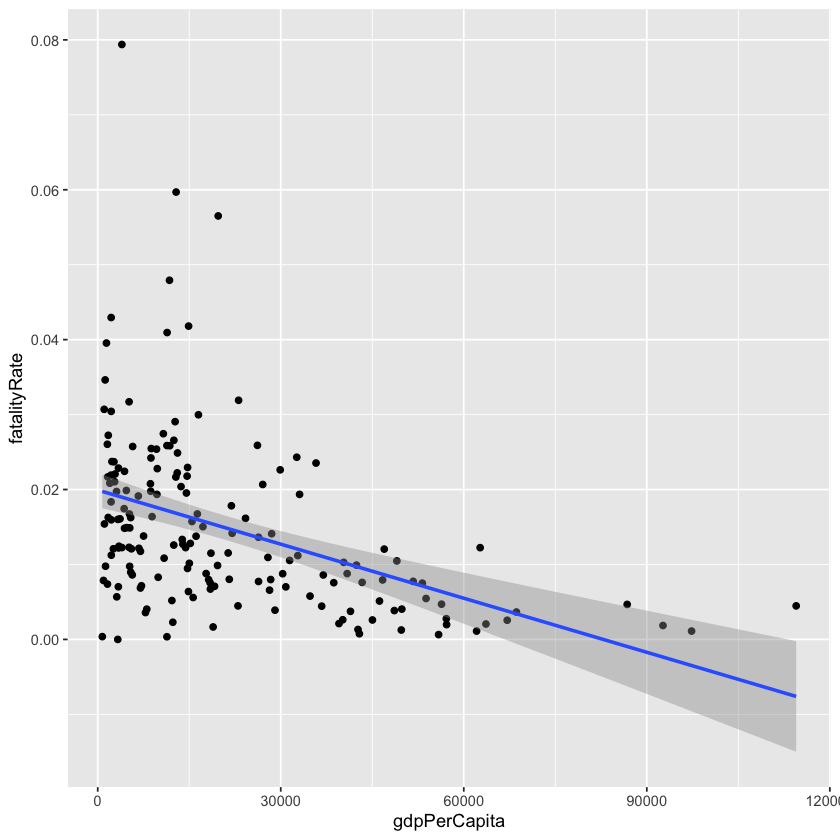

In [8]:
library(ggplot2)
ggplot(data, aes(x=gdpPerCapita, y=fatalityRate)) + 
  geom_point()+
  geom_smooth(method="lm", se=TRUE, fullrange=FALSE, level=0.95)

The coefficients for the intercept and the GDP per capita are 0.01993 and -0.0000002405 respectively. This means that fatality rate is equivalent to 0.01993 if the GDP per capita is 0, and for each dollar increase in the GDP per capita, the fatality rate decreases by 0.0000002405. With a p-value of 0.00000000525 (which is less than the threshold alpha level of 0.05), we can state that GDP per capita is significantly associated with COVID-19 fatality rate. The R-squared statistic is 0.18 which highlights the variance present in the data points relative to the line of best fit. 

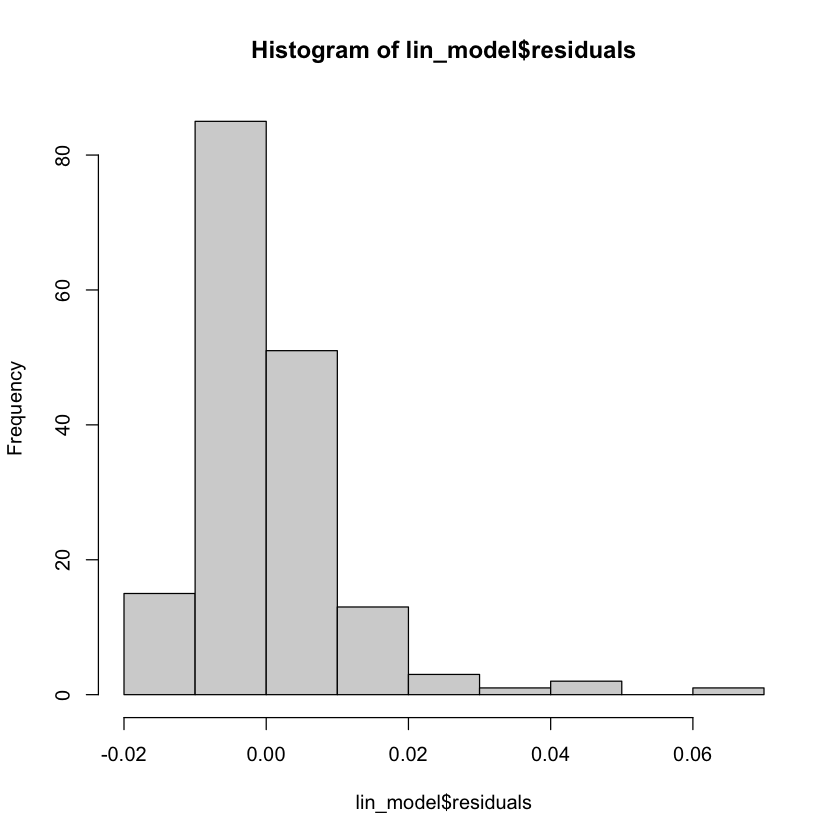

In [9]:
hist(lin_model$residuals)

The residuals for the linear regression model are symmetric around 0 which further entails that our model fits the data well

### 2. Mediation Analysis

My mediation analysis will include two regression models

<center>$M_{educationIndex} = a X_{GDP}$</center>
<center>$Y_{fatalityRate} = b M_{educationIndex} + c X_{GDP}$</center>

These equations combined would yield

<center>$Y_{fatalityRate} = ab X_{GDP} + c X_{GDP}$</center>

Where the coefficient $ab$ represents the indirect effect and $c$ represents the direct effect. My null hypothesis for this analysis is that there is no indirect effect

In [11]:
library(mediation)
library(MASS)
library(tidyverse)

Loading required package: MASS

Loading required package: Matrix

Loading required package: mvtnorm

Loading required package: sandwich

mediation: Causal Mediation Analysis
Version: 4.5.0


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ dplyr::select() masks MASS::select()
✖ tidyr::unpack() masks Matrix::unpack()



In [12]:
fitM = lm(educationIndex ~ gdpPerCapita, data=data) 
fitY = lm(fatalityRate ~ gdpPerCapita + educationIndex, data=data) 
fitMed = mediate(fitM, fitY, treat="gdpPerCapita", mediator="educationIndex", boot = FALSE) #We will bootstrap later
summary(fitMed)


Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

                Estimate 95% CI Lower 95% CI Upper p-value    
ACME           -4.57e-08    -1.28e-07         0.00    0.28    
ADE            -1.95e-07    -3.08e-07         0.00  <2e-16 ***
Total Effect   -2.41e-07    -3.19e-07         0.00  <2e-16 ***
Prop. Mediated  1.90e-01    -1.31e-01         0.56    0.28    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 171 


Simulations: 1000 


The Average Causal Mediation Effect (ACME), or the indirect effect ($ab$), is non-significant indirect effect, which means that the relationship between GDP per capita and COVID-19 fatality rate is not at all explained or mediated by Education Index. I found this to be surprising there is an association between GDP per capita and Education Index and believing that the Education Index mediates the relationship between GDP per capita and COVID-19 fatality rate is not far-fetched. The Average Direct Effect (ADE in the output summary or $c$ in the equations) is significant.  

### 3. Mediation Bootstrap Analysis

In [13]:
fitMedBoot = mediate(fitM, fitY, treat="gdpPerCapita", mediator="educationIndex", boot = FALSE, sims = 1000)
summary(fitMedBoot)


Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

                Estimate 95% CI Lower 95% CI Upper p-value    
ACME           -4.83e-08    -1.28e-07         0.00    0.24    
ADE            -1.92e-07    -3.09e-07         0.00  <2e-16 ***
Total Effect   -2.40e-07    -3.18e-07         0.00  <2e-16 ***
Prop. Mediated  1.98e-01    -1.28e-01         0.59    0.24    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 171 


Simulations: 1000 


Given the ACME value and p-value, we can confidently state that we fail to reject the null hypothesis that there is no indirect effect ($ab = 0$)

### 4. Cross-Validation Analysis

[1] 0.05794104


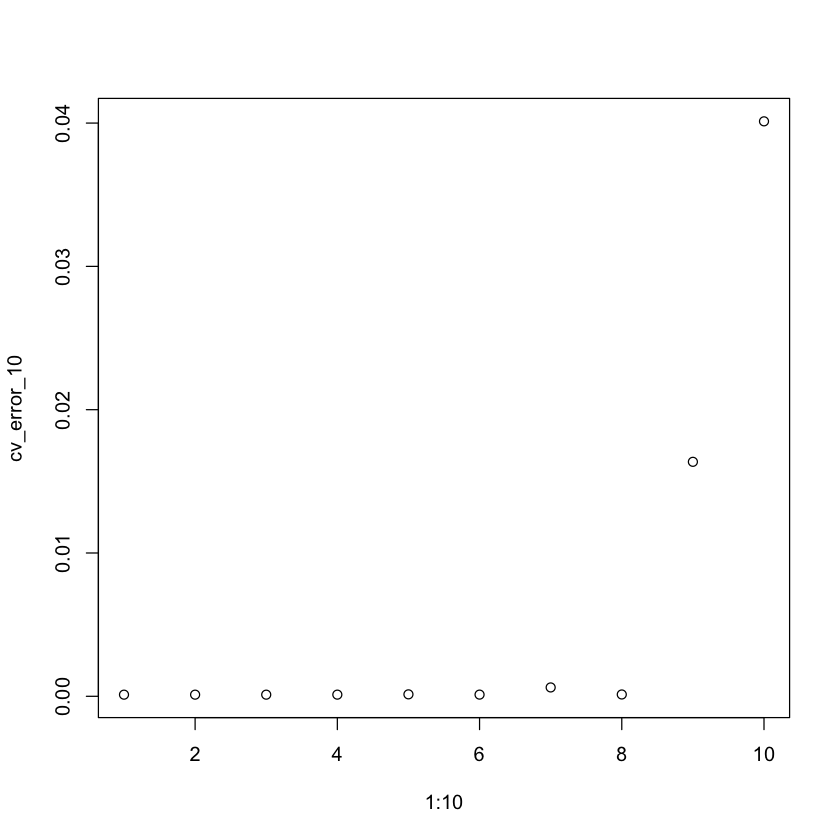

In [16]:
library(boot)
set.seed(4)

total_err = 0
cv_error_10 = rep(0,10)

for (i in 1:10){
  glm.fit=glm(fatalityRate~poly(gdpPerCapita,i), data=data) 
  cv_error_10[i] = cv.glm(data, glm.fit,K=10)$delta[1] #This is a 10-fold cross-validation
  total_err = total_err + cv_error_10[i]
}

plot(1:10,cv_error_10)
print(total_err)

Through the K-fold results, we can see that the linear model we have introduced previously itself performs well (1st degree polynomial). The error is maintained at a low value for higher degree polynomials and there is no real improvement in accuracy when you move up past the 2nd order polynomial (especially past the 8th degree, where the error skyrockets). Therefore, benefits of increasing the complexity of our model drop after that. We can verify this by plotting the first, second and third order polynomials.

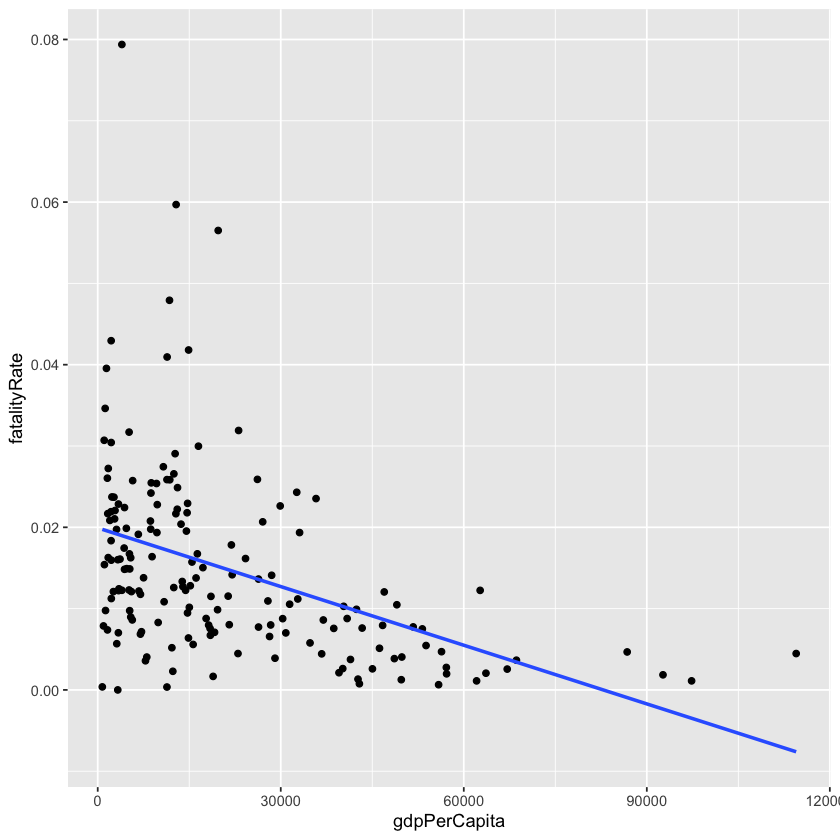

In [17]:
ggplot(aes(gdpPerCapita, fatalityRate),data=data) + geom_point() + stat_smooth(method = "lm", formula = y ~ poly(x,1), se = FALSE)

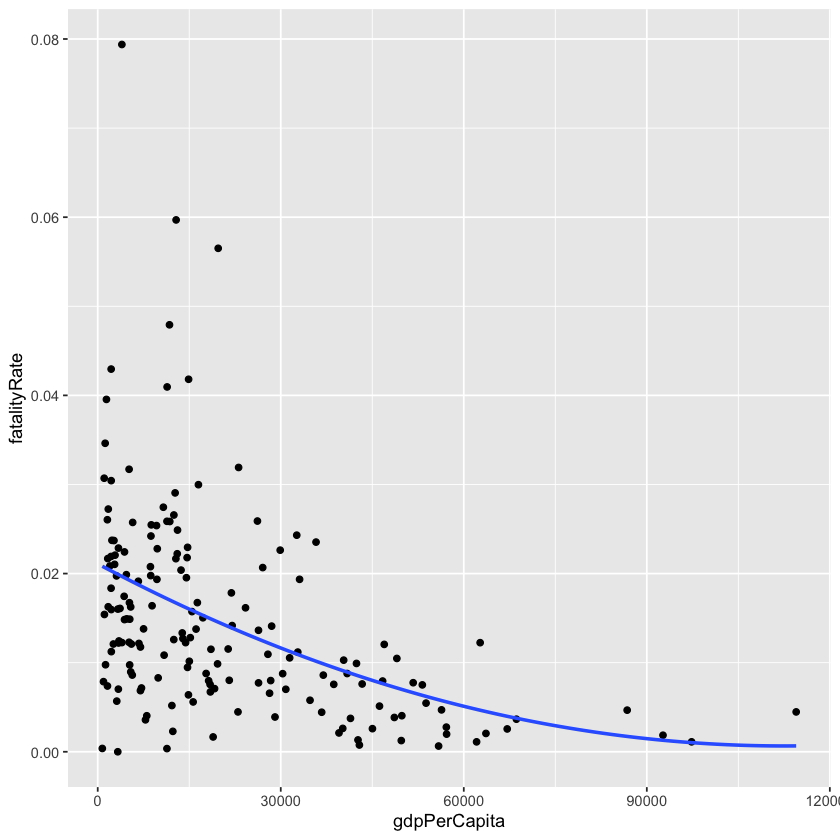

In [18]:
ggplot(aes(gdpPerCapita, fatalityRate),data=data) + geom_point() + stat_smooth(method = "lm", formula = y ~ poly(x,2), se = FALSE)

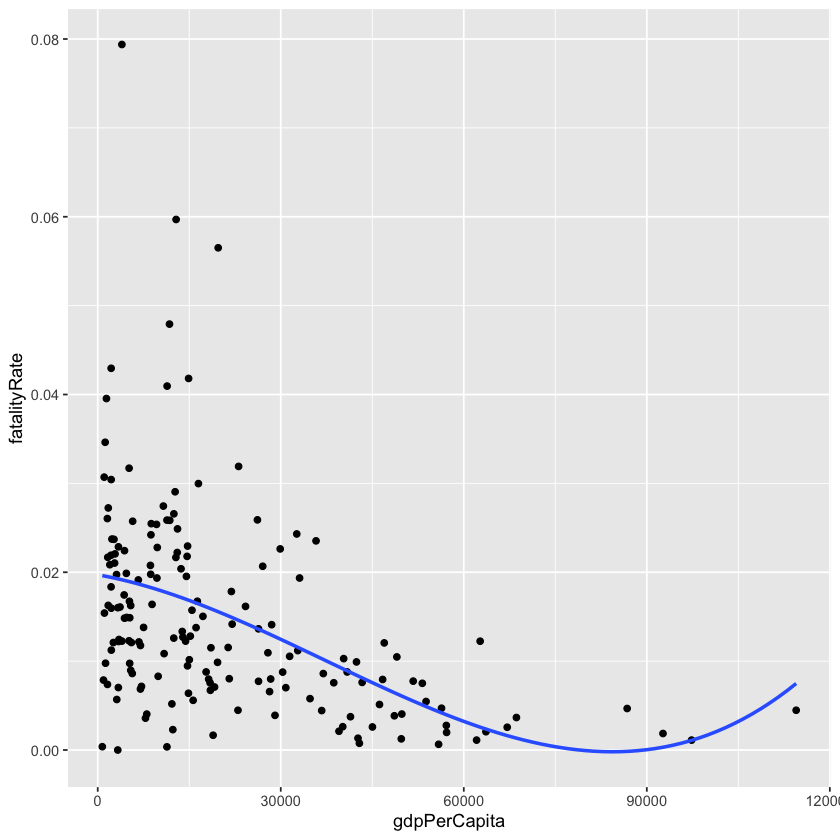

In [19]:
ggplot(aes(gdpPerCapita, fatalityRate),data=data) + geom_point() + stat_smooth(method = "lm", formula = y ~ poly(x,3), se = FALSE)

It is clear that the first and second order polynomials fit the data the best, and adding more bends and curves (as displayed in the third order polynomial) would not help the error

In [20]:
library(caret)
data_ctrl = trainControl(method = "cv", number = 10) #K=10
model_caret = train(fatalityRate ~ gdpPerCapita,   
                     data = data,                        
                     trControl = data_ctrl,              
                     method = "lm")  
model_caret

Loading required package: lattice


Attaching package: ‘lattice’


The following object is masked from ‘package:boot’:

    melanoma



Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




Linear Regression 

171 samples
  1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 154, 154, 154, 154, 155, 155, ... 
Resampling results:

  RMSE        Rsquared   MAE        
  0.01024037  0.2275861  0.007372343

Tuning parameter 'intercept' was held constant at a value of TRUE

The Root Mean Squared Error (RMSE), which measures the average difference between the predictions made by the model and actual observations, is 0.01024037 which is significantly low. This means that the model can predict the actual observations closely.
Moreover, the Mean Absolute Error (MAE), which is the average absolute difference between the predictions made by the model and the actual observations, is 0.007372343 which is also significantly low. This means that the model can predict the actual predictions really well, adding a predictive element to the overall analysis. 

### Conclusion

We tested the hypothesis that GDP per capita associates COVID-19 fatality rate across 171 countries. The linear regression model examining the relationship between GDP per capita and COVID-19 fatality rate found a significant association between the two variables. Although the residual values were not too low and the R-squared value was not that strong, there was still a significant association between the two variables. The mediation analysis was conducted to test a hypothesis of whether the variable *educationIndex* shows a mediation effect. The null hypothesis that there is no indirect effect was accepted, and only the direct effect of GDP per capita was significant. As a test of how well the model predicts actual observations, a 10-fold Cross-Validation analysis was conducted which showed that the model can predict actual predictions really well. 